In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# seed 고정
import random
import os
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
# 경고 메시지 무시
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# 한글 필요 라이브러리 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 119628 files and direct

In [ ]:
# 한글 폰트 불러오기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

### 데이터 불러오기

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/성균관대학교 과제/3학년 2학기/캡스톤설계프로젝트/정신질환 정보 크롤링.csv')

df.head()

,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애\n감수일 2020.05.11,정의: 우선 조울병은 우울증과 함께 정신건강의학과에서 기분장애에 속하는 질환이며 정...,사례: 사례) 29세/A씨\n\n29세 A씨는 1개월 전부터 이전과 달리 갑자기 기...,약물치료: 약물치료 \n1형 양극성장애를 치료하기 위해 가장 중요한 약제는 기분조절...,지원체계: 도움이 되는 곳\n보건복지부에서 운영하는 중앙자살예방센터(http://w...
1,2형 양극성장애\n감수일 2020.05.06,정의: 우선 2형 양극성장애는 큰 분류에 있어 1형 양극성장애와 함께 양극성장애에 ...,사례: 사례) 26세/취업준비생\n\n26세 A씨는 최근 1년간 교제한 이성친구로부...,약물치료: 약물치료 \n2형 양극성장애를 치료하기 위해 가장 중요한 약제는 기분조절...,지원체계: 도움이 되는 곳\n보건복지부에서 운영하는 중앙자살예방센터(http://w...
2,강박장애\n감수일 2020.05.24,정의: 셰익스피어의 희곡 ‘맥베스’에서 남편이 사촌 형을 살해하도록 부추긴 맥베스 ...,"사례: 원치 않는 생각, 어쩔 수 없는 행동\n 강박사고\n\n1. 오염: 소...",약물치료: 약물치료\n대개 세로토닌이라는 신경전달물질을 증가시키는 세로토닌 재흡수 ...,지원체계: 1. 가장 중요한 원칙은 강박행동을 지속하는 한 강박장애는 결코 낫지 않...
3,거식증\n감수일 2021.12.22,"정의: 거식증은 대표적인 섭식장애의 하나로, 식욕이 정상이거나 오히려 증가된 상태에...",사례: 거식증은 치료하기가 무척 까다로운 정신질환 중 하나입니다. 스스로 증상에 대...,약물치료: 정신약물치료\n\n정신약물치료는 환자의 임상적인 상태에 맞게 시행됩니다....,"지원체계: Reference\n1. Sadock, B. J., Sadock, V. ..."
4,경계성 성격장애\n감수일 2020.05.14,"정의: 경계성 인격장애의 ‘경계성’이란 명칭은, 정신질환을 신경증과 정신증으로 나누...",사례: 사례) 27세/여성\n“버림받느니 죽는 게 나아!”\n\n27세 여성 B 씨...,약물치료: 약물치료\n경계성 성격장애에 대한 약물치료는 목표하는 증상 중심의 약물 ...,지원체계: 참고문헌\n1. 대한신경정신의학회. 신경정신의학. 서울:아이엠이즈컴퍼니;...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   질환명       50 non-null     object
 1   개요        50 non-null     object
 2   진단        50 non-null     object
 3   치료        50 non-null     object
 4   스스로 돕는 법  50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


### 자연어 데이터 전처리

#### 질환명 칼럼 전처리

In [ ]:
import pandas as pd

# 정규표현식을 사용하여 불필요한 부분 제거
df['질환명'] = df['질환명'].str.replace(r'\n.*$', '', regex=True)

df.head()

,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애,정의: 우선 조울병은 우울증과 함께 정신건강의학과에서 기분장애에 속하는 질환이며 정...,사례: 사례) 29세/A씨\n\n29세 A씨는 1개월 전부터 이전과 달리 갑자기 기...,약물치료: 약물치료 \n1형 양극성장애를 치료하기 위해 가장 중요한 약제는 기분조절...,지원체계: 도움이 되는 곳\n보건복지부에서 운영하는 중앙자살예방센터(http://w...
1,2형 양극성장애,정의: 우선 2형 양극성장애는 큰 분류에 있어 1형 양극성장애와 함께 양극성장애에 ...,사례: 사례) 26세/취업준비생\n\n26세 A씨는 최근 1년간 교제한 이성친구로부...,약물치료: 약물치료 \n2형 양극성장애를 치료하기 위해 가장 중요한 약제는 기분조절...,지원체계: 도움이 되는 곳\n보건복지부에서 운영하는 중앙자살예방센터(http://w...
2,강박장애,정의: 셰익스피어의 희곡 ‘맥베스’에서 남편이 사촌 형을 살해하도록 부추긴 맥베스 ...,"사례: 원치 않는 생각, 어쩔 수 없는 행동\n 강박사고\n\n1. 오염: 소...",약물치료: 약물치료\n대개 세로토닌이라는 신경전달물질을 증가시키는 세로토닌 재흡수 ...,지원체계: 1. 가장 중요한 원칙은 강박행동을 지속하는 한 강박장애는 결코 낫지 않...
3,거식증,"정의: 거식증은 대표적인 섭식장애의 하나로, 식욕이 정상이거나 오히려 증가된 상태에...",사례: 거식증은 치료하기가 무척 까다로운 정신질환 중 하나입니다. 스스로 증상에 대...,약물치료: 정신약물치료\n\n정신약물치료는 환자의 임상적인 상태에 맞게 시행됩니다....,"지원체계: Reference\n1. Sadock, B. J., Sadock, V. ..."
4,경계성 성격장애,"정의: 경계성 인격장애의 ‘경계성’이란 명칭은, 정신질환을 신경증과 정신증으로 나누...",사례: 사례) 27세/여성\n“버림받느니 죽는 게 나아!”\n\n27세 여성 B 씨...,약물치료: 약물치료\n경계성 성격장애에 대한 약물치료는 목표하는 증상 중심의 약물 ...,지원체계: 참고문헌\n1. 대한신경정신의학회. 신경정신의학. 서울:아이엠이즈컴퍼니;...


In [ ]:
df['질환명'].unique()

array(['1형 양극성장애', '2형 양극성장애', '강박장애', '거식증', '경계성 성격장애', '경도인지장애',
       '공황장애', '기면증', '노인우울증', '도박장애', '망상장애', '물질관련장애(마약성진통제)',
       '반사회성 인격장애', '배설장애', '범불안장애', '불면장애', '불안장애', '사회 불안장애', '섬망',
       '성격장애', '성인ADHD', '수면과 수면장애', '수면무호흡증', '스트레스', '신경성 폭식증',
       '신체증상장애', '알츠하이머 치매', '알코올사용장애', '야경증', '여성우울증', '연극성 인격장애',
       '외상후 스트레스장애', '우울과 우울장애', '월경 전 불쾌감 증상', '일주기리듬 수면각성장애',
       '자살과 자살예방', '자폐스펙트럼장애', '적응장애', '전두측두엽 신경인지장애', '정신증', '조현병',
       '주요우울장애', '주의력결핍 과잉행동장애', '중독(의존)', '지적장애', '특정 학습장애', '틱장애',
       '품행장애', '하지 불안 증후군', '혈관성 신경인지장애'], dtype=object)

In [ ]:
df.isna().sum()

,0
질환명,0
개요,0
진단,0
치료,0
스스로 돕는 법,0


#### 1. Text Cleaning(특수문자 제거)

In [ ]:
!pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 처리할 칼럼 목록
columns = ['개요', '진단', '치료', '스스로 돕는 법']

In [ ]:
import pandas as pd
from tqdm import tqdm
import re
import kss

# 데이터프레임 각 열에 대해 텍스트 정제 및 한글 문장 분리
for column in columns:
    for i in tqdm(range(len(df))):

        # 특정 열에서 텍스트를 가져옴
        text = df.at[i, column]

        # 값이 0이 아닌 경우에만 정제 수행
        if text != 0:
            # 완성형 한글을 제외한 모든 문자를 공백으로 대체
            cleaned_text = re.sub('[^가-힣]', ' ', text)

            # 띄어쓰기(공백)가 반복될 경우 1개로 축소
            cleaned_text = re.sub('[ ]{2,}', ' ', cleaned_text).strip()

            # 문장 분리 수행
            sentences = kss.split_sentences(cleaned_text)

            # 문장 리스트를 하나의 문자열로 결합
            combined_text = ' '.join(sentences)

            # 결과를 다시 데이터프레임에 저장
            df.at[i, column] = combined_text

# 결과 확인
df.head()

  0%|          | 0/50 [00:00<?, ?it/s]WARNING:root:Oh! You have mecab in your environment. Kss will take this as a backend! :D

100%|██████████| 50/50 [00:01<00:00, 28.36it/s]


,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애,정의 우선 조울병은 우울증과 함께 정신건강의학과에서 기분장애에 속하는 질환이며 정신...,사례 사례 세 씨 세 씨는 개월 전부터 이전과 달리 갑자기 기분이 좋아지는 느낌이 ...,약물치료 약물치료 형 양극성장애를 치료하기 위해 가장 중요한 약제는 기분조절제입니다...,지원체계 도움이 되는 곳 보건복지부에서 운영하는 중앙자살예방센터 의 전화 로 시간 ...
1,2형 양극성장애,정의 우선 형 양극성장애는 큰 분류에 있어 형 양극성장애와 함께 양극성장애에 포함됩...,사례 사례 세 취업준비생 세 씨는 최근 년간 교제한 이성친구로부터 이별을 통보받고 ...,약물치료 약물치료 형 양극성장애를 치료하기 위해 가장 중요한 약제는 기분조절제입니다...,지원체계 도움이 되는 곳 보건복지부에서 운영하는 중앙자살예방센터 의 전화 로 시간 ...
2,강박장애,정의 셰익스피어의 희곡 맥베스 에서 남편이 사촌 형을 살해하도록 부추긴 맥베스 부인...,사례 원치 않는 생각 어쩔 수 없는 행동 강박사고 오염 소변 대변 침 피 먼지 세균...,약물치료 약물치료 대개 세로토닌이라는 신경전달물질을 증가시키는 세로토닌 재흡수 억제...,지원체계 가장 중요한 원칙은 강박행동을 지속하는 한 강박장애는 결코 낫지 않는다는 ...
3,거식증,정의 거식증은 대표적인 섭식장애의 하나로 식욕이 정상이거나 오히려 증가된 상태에서 ...,사례 거식증은 치료하기가 무척 까다로운 정신질환 중 하나입니다 스스로 증상에 대한 ...,약물치료 정신약물치료 정신약물치료는 환자의 임상적인 상태에 맞게 시행됩니다 가장 흔...,지원체계 스스로 돕는 법 정보 없음
4,경계성 성격장애,정의 경계성 인격장애의 경계성 이란 명칭은 정신질환을 신경증과 정신증으로 나누어 생...,사례 사례 세 여성 버림받느니 죽는 게 나아 세 여성 씨는 수년 전부터 자해 행동을...,약물치료 약물치료 경계성 성격장애에 대한 약물치료는 목표하는 증상 중심의 약물 선택...,지원체계 참고문헌 대한신경정신의학회 신경정신의학 서울 아이엠이즈컴퍼니 권준수 편저 ...


#### 2. 단어 토큰화(형태소 분석기 이용)
- nltk, mecab 동시에 사용

In [ ]:
# 한글 형태소 분석기 konlpy와 형태소 분석기 nltk, mecab
!pip install konlpy
!pip install nltk
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 90.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 8.1 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=50b81bc7a260a9a3bedf3fd9e8f754fc2d1f306582c1e58a1aaa923a90e35eb6
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
from konlpy.tag import Mecab
import nltk

# nltk punkt 데이터 다운로드
nltk.download('punkt')

# Mecab 형태소 분석기 초기화
mecab = Mecab()

# 데이터프레임 각 열에 대해 텍스트 토큰화 적용
for column in columns:
    for i in range(len(df)):
        text = df.iloc[i][column]

        # 값이 0이 아닌 경우에만 전처리 수행
        if text != 0:
            # nltk를 사용하여 토큰화
            nltk_tokens = nltk.word_tokenize(text)
            nltk_tokenized_text = ' '.join(nltk_tokens)

            # Mecab을 사용하여 추가 형태소 분석
            mecab_tokens = mecab.morphs(nltk_tokenized_text)

            # 결과를 기존 열에 덮어쓰기
            df.at[i, column] = ','.join(mecab_tokens)

# 결과 확인
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애,"정의,우선,조울병,은,우울증,과,함께,정신,건강,의,학과,에서,기분,장애,에,속하,...","사례,사례,세,씨,세,씨,는,개월,전,부터,이전,과,달리,갑자기,기분,이,좋,아,지...","약물,치료,약물,치료,형,양극,성,장애,를,치료,하,기,위해,가장,중요,한,약제,는...","지원,체계,도움,이,되,는,곳,보건복지부,에서,운영,하,는,중앙,자살,예방,센터,의..."
1,2형 양극성장애,"정의,우선,형,양극,성,장애,는,큰,분류,에,있,어,형,양극,성,장애,와,함께,양극...","사례,사례,세,취업,준비,생,세,씨,는,최근,년,간,교제,한,이성,친구,로부터,이별...","약물,치료,약물,치료,형,양극,성,장애,를,치료,하,기,위해,가장,중요,한,약제,는...","지원,체계,도움,이,되,는,곳,보건복지부,에서,운영,하,는,중앙,자살,예방,센터,의..."
2,강박장애,"정의,셰익스피어,의,희곡,맥베스,에서,남편,이,사촌,형,을,살해,하,도록,부추긴,맥...","사례,원치,않,는,생각,어쩔,수,없,는,행동,강박,사고,오염,소변,대변,침,피,먼지...","약물,치료,약물,치료,대개,세로토닌,이,라는,신경,전달,물질,을,증가,시키,는,세로...","지원,체계,가장,중요,한,원칙,은,강박,행동,을,지속,하,는,한,강박,장애,는,결코..."
3,거식증,"정의,거식증,은,대표,적,인,섭식,장애,의,하나,로,식욕,이,정상,이,거나,오히려,...","사례,거식증,은,치료,하,기,가,무척,까다로운,정신,질환,중,하나,입니다,스스로,증...","약물,치료,정신,약물,치료,정신,약물,치료,는,환자,의,임상,적,인,상태,에,맞,게...","지원,체계,스스로,돕,는,법,정보,없,음"
4,경계성 성격장애,"정의,경계,성,인격,장애,의,경계,성,이란,명칭,은,정신,질환,을,신경증,과,정신증...","사례,사례,세,여성,버림,받,느니,죽,는,게,나,아,세,여성,씨,는,수년,전,부터,...","약물,치료,약물,치료,경계,성,성격,장애,에,대한,약물,치료,는,목표,하,는,증상,...","지원,체계,참고,문헌,대한,신경,정신,의,학회,신경,정신,의학,서울,아이,엠,이,즈..."


#### 3. 불용어 제거

In [ ]:
# 불용어 CSV 파일 불러오기
stopwords_csv = pd.read_csv("/content/drive/MyDrive/성균관대학교 과제/3학년 2학기/캡스톤설계프로젝트/stopwords.csv", header=None)
stopwords = set(stopwords_csv[0].tolist())  # 첫 번째 열을 리스트로 변환 후 세트로 변환
stopwords

{'가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '권',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다고',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자

In [ ]:
# 각 열에 대해 불용어 제거 수행
for column in tqdm(columns, desc='Processing columns'):
    for i in tqdm(range(len(df)), desc=f'Processing rows for column {column}', leave=False):
        if df.at[i, column] != 0:
            tokens = df.at[i, column].split(',')  # 콤마로 구분된 토큰을 다시 리스트로 변환
            filtered_tokens = [token for token in tokens if token not in stopwords]
            df.at[i, column] = ','.join(filtered_tokens)

# 결과 확인
df.head()

Processing rows for column 개요:   0%|          | 0/50 [00:00<?, ?it/s]
                                                                       
Processing rows for column 진단:   0%|          | 0/50 [00:00<?, ?it/s]
                                                                       
Processing rows for column 치료:   0%|          | 0/50 [00:00<?, ?it/s]
                                                                       
Processing columns: 100%|██████████| 4/4 [00:00<00:00, 70.59it/s]


,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애,"정의,조울병,은,우울증,정신,건강,학과,기분,장애,속하,는,질환,며,정신,장애,진단...","사례,사례,세,씨,세,씨,는,개월,전,이전,달리,갑자기,기분,좋,는,느낌,욕,생기,...","약물,치료,약물,치료,형,양극,성,장애,치료,기,위해,가장,중요,한,약제,는,기분,...","지원,체계,도움,는,곳,보건복지부,운영,는,중앙,자살,예방,센터,전화,정신,건강,상..."
1,2형 양극성장애,"정의,형,양극,성,장애,는,큰,분류,형,양극,성,장애,양극,성,장애,포함,됩니다,형...","사례,사례,세,취업,준비,생,세,씨,는,최근,간,교제,한,이성,친구,이별,통보,받,...","약물,치료,약물,치료,형,양극,성,장애,치료,기,위해,가장,중요,한,약제,는,기분,...","지원,체계,도움,는,곳,보건복지부,운영,는,중앙,자살,예방,센터,전화,정신,건강,상..."
2,강박장애,"정의,셰익스피어,희곡,맥베스,남편,사촌,형,살해,부추긴,맥베스,부인,대사,입니다,그...","사례,원치,는,생각,어쩔,없,는,행동,강박,사고,오염,소변,대변,침,피,먼지,세균,...","약물,치료,약물,치료,대개,세로토닌,라는,신경,전달,물질,증가,시키,는,세로토닌,재...","지원,체계,가장,중요,한,원칙,은,강박,행동,지속,는,한,강박,장애,는,결코,낫,는..."
3,거식증,"정의,거식증,은,대표,적,섭식,장애,식욕,정상,거나,증가,된,상태,마르,싶,다는,끝...","사례,거식증,은,치료,기,무척,까다로운,정신,질환,중,입니다,스스로,증상,대한,병식...","약물,치료,정신,약물,치료,정신,약물,치료,는,환자,임상,적,상태,맞,게,시행,됩니...","지원,체계,스스로,돕,는,법,정보,없,음"
4,경계성 성격장애,"정의,경계,성,인격,장애,경계,성,이란,명칭,은,정신,질환,신경증,정신증,나누,생각...","사례,사례,세,여성,버림,받,느니,죽,는,게,세,여성,씨,는,수년,전,자해,행동,반...","약물,치료,약물,치료,경계,성,성격,장애,대한,약물,치료,는,목표,는,증상,중심,약...","지원,체계,참고,문헌,대한,신경,정신,학회,신경,정신,의학,서울,엠,즈,컴퍼니,준수..."


#### 4. 품사 태깅
- 명사(NNG), 고유명사(NNP), 동사(VV), 형용사(VA) 추출

**동사**: 행위(반복하다, 정리하다, 피해주다 등)와 관련한 키워드 추출  
**형용사**: 사람의 감정(불안하다, 두려워하다 등)과 관련한 키워드 추출

In [ ]:
import pandas as pd
from konlpy.tag import Mecab

# Mecab 객체 초기화
mecab = Mecab()

# 명사, 고유명사, 동사, 형용사 추출 함수
def extract_nouns(tokens):
    return [f"{word}/{tag}" for word, tag in tokens if tag in ['NNG', 'NNP', 'VV', 'VA']]

# 데이터프레임 각 열에 대해 텍스트 토큰화 및 품사 태깅 적용
for column in columns:
    for i in range(len(df)):
        text = df.iloc[i][column]

        # 값이 0이 아닌 경우에만 전처리 수행
        if text != 0:
            # Mecab을 사용하여 품사 태깅
            tokens = mecab.pos(text)

            # 명사와 고유명사만 추출
            filtered_tokens = extract_nouns(tokens)

            # 태깅된 토큰을 문자열로 변환하여 저장
            tagged_tokens_str = ','.join(filtered_tokens)
            df.at[i, column] = tagged_tokens_str

# 결과 확인
df.head()

,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애,"정의/NNG,조울병/NNG,우울증/NNG,정신/NNG,건강/NNG,학과/NNG,기분...","사례/NNG,사례/NNG,전/NNG,이전/NNG,기분/NNG,좋/VA,욕/NNG,생...","약물/NNG,치료/NNG,약물/NNG,치료/NNG,형/NNG,양극/NNG,성/NNG...","지원/NNG,체계/NNG,도움/NNG,보건복지부/NNP,운영/NNG,중앙/NNG,자..."
1,2형 양극성장애,"정의/NNG,형/NNG,양극/NNG,성/NNG,장애/NNG,분류/NNG,형/NNG,...","사례/NNG,사례/NNG,취업/NNG,준비/NNG,생/NNP,최근/NNG,간/NNG...","약물/NNG,치료/NNG,약물/NNG,치료/NNG,형/NNG,양극/NNG,성/NNG...","지원/NNG,체계/NNG,도움/NNG,보건복지부/NNP,운영/NNG,중앙/NNG,자..."
2,강박장애,"정의/NNG,셰익스피어/NNP,희곡/NNP,맥베스/NNG,남편/NNG,사촌/NNG,...","사례/NNG,생각/NNG,없/VA,행동/NNG,강박/NNG,사고/NNG,오염/NNG...","약물/NNG,치료/NNG,약물/NNG,치료/NNG,세로토닌/NNG,신경/NNG,전달...","지원/NNG,체계/NNG,중요/NNG,원칙/NNG,강박/NNG,행동/NNG,지속/N..."
3,거식증,"정의/NNG,거식증/NNG,대표/NNG,적/NNG,섭식/NNG,장애/NNG,식욕/N...","사례/NNG,거식증/NNG,치료/NNG,정신/NNG,질환/NNG,중/NNG,증상/N...","약물/NNG,치료/NNG,정신/NNG,약물/NNG,치료/NNG,정신/NNG,약물/N...","지원/NNG,체계/NNG,돕/VV,법/NNG,정보/NNG,없/VA"
4,경계성 성격장애,"정의/NNG,경계/NNG,성/NNG,인격/NNG,장애/NNG,경계/NNG,성/NNG...","사례/NNG,사례/NNG,여성/NNG,받/VV,느/VV,여성/NNG,수년/NNG,전...","약물/NNG,치료/NNG,약물/NNG,치료/NNG,경계/NNG,성/NNG,성격/NN...","지원/NNG,체계/NNG,참고/NNG,문헌/NNG,신경/NNG,정신/NNG,학회/N..."


In [ ]:
# 태그 제거 함수
def remove_tags(text):
    # 입력이 문자열이 아닌 경우 문자열로 변환
    if not isinstance(text, str):
        text = str(text)
    # 쉼표로 분리하고, 태그 부분을 제거
    words = [word.split('/')[0] for word in text.split(',')]
    # 리스트를 다시 문자열로 변환하여 반환
    return ','.join(words)

# 데이터프레임의 각 칼럼에 대해 태그를 제거
for column in ['개요', '진단', '치료', '스스로 돕는 법']:
    df[column] = df[column].apply(remove_tags)

# 결과를 CSV 파일로 저장
# df_out.to_csv('/content/drive/MyDrive/성균관대학교 과제/3학년 2학기/캡스톤설계프로젝트/preprocessed_data.csv', encoding='utf-8-sig', index=False)

df.head()

,질환명,개요,진단,치료,스스로 돕는 법
0,1형 양극성장애,"정의,조울병,우울증,정신,건강,학과,기분,장애,속,질환,정신,장애,진단,통계,편람,...","사례,사례,전,이전,기분,좋,욕,생기,학원,다니,밤,늦,공부,밖,피곤,평소,연락,친...","약물,치료,약물,치료,형,양극,성,장애,치료,중요,약제,기분,조절,최근,형,양극,성...","지원,체계,도움,보건복지부,운영,중앙,자살,예방,센터,전화,정신,건강,상담,가능,보..."
1,2형 양극성장애,"정의,형,양극,성,장애,분류,형,양극,성,장애,양극,성,장애,포함,형,양극,성,장애...","사례,사례,취업,준비,생,최근,간,교제,이성,친구,이별,통보,받,약,달,간,우울,감...","약물,치료,약물,치료,형,양극,성,장애,치료,중요,약제,기분,조절,최근,양극,성,장...","지원,체계,도움,보건복지부,운영,중앙,자살,예방,센터,전화,정신,건강,상담,가능,보..."
2,강박장애,"정의,셰익스피어,희곡,맥베스,남편,사촌,형,살해,맥베스,부인,대사,손,씻,어도,핏자...","사례,생각,없,행동,강박,사고,오염,소변,대변,침,먼지,세균,끈,물질,화학,물질,환...","약물,치료,약물,치료,세로토닌,신경,전달,물질,증가,시키,세로토닌,재흡수,억제제,계...","지원,체계,중요,원칙,강박,행동,지속,강박,장애,낫,강박,행동,행동,옮,행동,자체,..."
3,거식증,"정의,거식증,대표,적,섭식,장애,식욕,정상,증가,상태,마르,끝,없,욕구,살찌,공포,...","사례,거식증,치료,정신,질환,중,증상,병식,부족,경우,많,치료,동기,떨어지,많,환자...","약물,치료,정신,약물,치료,정신,약물,치료,환자,임상,적,상태,맞,시행,사용,항우울...","지원,체계,돕,법,정보,없"
4,경계성 성격장애,"정의,경계,성,인격,장애,경계,성,이란,명칭,정신,질환,신경증,정신증,나누,생각,예...","사례,사례,여성,받,느,여성,수년,전,자,행동,반복,삶,공허,희생양,사람,이용,다,...","약물,치료,약물,치료,경계,성,성격,장애,약물,치료,목표,증상,중심,약물,선택,치료...","지원,체계,참고,문헌,신경,정신,학회,신경,정신,의학,서울,엠,즈,컴퍼니,준수,편저..."


In [ ]:
"""
# 태그 제거 및 중복 제거 함수
def remove_tags_and_duplicates(text):
    # 입력이 문자열이 아닌 경우 문자열로 변환
    if not isinstance(text, str):
        text = str(text)
    # 쉼표로 분리하고, 태그 부분을 제거한 후, 중복을 제거하기 위해 set 사용
    words = {word.split('/')[0] for word in text.split(',')}
    # 집합(set)을 다시 문자열로 변환하여 반환
    return ','.join(words)

df_out = df.copy()

# 데이터프레임의 각 칼럼에 대해 태그를 제거하고 중복을 제거
for column in ['개요', '진단', '치료', '스스로 돕는 법']:
    df_out[column] = df_out[column].apply(remove_tags_and_duplicates)

# 결과를 CSV 파일로 저장
#df_out.to_csv('/content/drive/MyDrive/성균관대학교 과제/3학년 2학기/캡스톤설계프로젝트/preprocessed_data.csv', encoding='utf-8-sig', index=False)

df_out.head()
"""

SyntaxError: incomplete input (<ipython-input-18-c77f265eefb6>, line 1)

## 질환별 증상 추출

### TF-IDF 키워드 추출
- 각 질환별 키워드 우선순위 도출를 위한 TF-IDF 가중치 분석
- 비교군 설정을 위한, 빈도수 기준 키워드 추출도 진행

In [ ]:
# 빈도 계산
from collections import Counter
import pandas as pd

# 각 질환별로 토큰들을 추출하고 빈도 계산하는 함수('개요', '진단' -> 증상)
def calculate_token_frequencies_by_disease(df, col1, col2):
    # 질환명을 기준으로 데이터 그룹화
    disease_groups = df.groupby('질환명')
    # 각 질환별 빈도 데이터를 저장할 딕셔너리
    disease_token_frequencies = {}

    for name, group in disease_groups:
        token_counts = Counter()
        for index, row in group.iterrows():
            tokens = row[col1].split(',') + row[col2].split(',')
            token_counts.update(tokens)
        disease_token_frequencies[name] = token_counts

    return disease_token_frequencies

# 각 질환별 '개요'와 '진단' 칼럼에서 토큰 빈도 계산
disease_token_frequencies = calculate_token_frequencies_by_disease(df, '개요', '진단')

# 결과 데이터프레임을 하나로 통합
all_diseases_df = pd.DataFrame()
for disease, frequencies in disease_token_frequencies.items():
    token_freq_df = pd.DataFrame(list(frequencies.items()), columns=['토큰', '빈도'])
    token_freq_df['질환명'] = disease  # 질환명 추가
    all_diseases_df = pd.concat([all_diseases_df, token_freq_df], ignore_index=True)

all_diseases_df.sort_values(['질환명', '빈도'], ascending=[True, False], inplace=True)

all_diseases_df[0:20]

,토큰,빈도,질환명
22,적,52,1형 양극성장애
7,장애,41,1형 양극성장애
14,성,34,1형 양극성장애
13,양극,31,1형 양극성장애
6,기분,16,1형 양극성장애
25,삽화,15,1형 양극성장애
10,진단,13,1형 양극성장애
29,경험,13,1형 양극성장애
30,경우,13,1형 양극성장애
166,평소,13,1형 양극성장애


In [ ]:
# TF-IDF 계산
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 두 개의 칼럼을 결합하여 하나의 문서로 만드는 함수
def combine_columns(df, col1, col2):
    # 각 행의 두 칼럼을 공백으로 구분하여 하나의 문자열로 결합
    combined = df[col1] + " " + df[col2]
    return combined

# TF-IDF 계산 함수
def calculate_tfidf(docs):
    vectorizer = TfidfVectorizer(norm=None)
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

df['combined'] = combine_columns(df, '개요', '진단') # '개요', '진단' -> 증상
tfidf_matrix, feature_names = calculate_tfidf(df['combined']) # TF-IDF 값 계산

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df['질환명'])

tfidf_df[0:20]

,가가,가게,가계,가깝,가난,가능,가다듬,가담,가라앉,가래,...,흥미,흥분,희곡,희망,희생양,희생자,흰색,히로뽕,히스타민,히포크라테스
질환명,,,,,,,,,,,,,,,,,,,,,
1형 양극성장애,0.0,0.000000,0.000000,0.0,0.0,2.810930,0.0,0.000000,3.322388,0.0,...,2.629241,2.734601,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2형 양극성장애,0.0,0.000000,0.000000,0.0,0.0,1.405465,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
강박장애,0.0,0.000000,0.000000,0.0,0.0,1.405465,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,4.238678,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
거식증,0.0,0.000000,0.000000,0.0,0.0,1.405465,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
경계성 성격장애,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,3.833213,0.0,0.0,0.0,0.000000,0.0
경도인지장애,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
공황장애,0.0,3.833213,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
기면증,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
노인우울증,0.0,0.000000,0.000000,0.0,0.0,2.810930,0.0,0.000000,0.000000,0.0,...,10.516962,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# TF-IDF 점수가 0 이상인 토큰 필터링 함수(각 질환별로 중요한 토큰만 추출)
def filter_tfidf_and_sort(df):
    important_tokens_dfs = {}
    for disease, row in df.iterrows():
        filtered_tokens = row[row > 0].sort_values(ascending=False)
        important_tokens_df = pd.DataFrame(filtered_tokens.items(), columns=['토큰', 'TF-IDF'])
        important_tokens_dfs[disease] = important_tokens_df

    return important_tokens_dfs

# 중요 토큰 데이터프레임을 하나의 데이터프레임으로 통합 함수
def consolidate_dfs(important_tokens_dict):
    df_list = []
    for disease, df in important_tokens_dict.items():
        df['질환명'] = disease  # 각 데이터프레임에 '질환명' 열 추가
        df_list.append(df)

    # 모든 데이터프레임을 하나로 합치기
    consolidated_df = pd.concat(df_list, ignore_index=True)
    return consolidated_df

important_tokens_per_disease = filter_tfidf_and_sort(tfidf_df)
consolidated_df = consolidate_dfs(important_tokens_per_disease)
consolidated_df = consolidated_df[['질환명', '토큰', 'TF-IDF']] # 칼럼 순서 변경

consolidated_df[0:20]

,질환명,토큰,TF-IDF
0,1형 양극성장애,양극,88.423907
1,1형 양극성장애,삽화,42.785761
2,1형 양극성장애,장애,41.811908
3,1형 양극성장애,조증,37.680794
4,1형 양극성장애,기분,26.175820
5,1형 양극성장애,평소,24.534942
6,1형 양극성장애,경험,19.898167
7,1형 양극성장애,조울병,19.166067
8,1형 양극성장애,우울증,15.098426
9,1형 양극성장애,경우,13.520069


In [ ]:
# 두 데이터프레임 병합(TF-IDF 기준)
merged = pd.merge(consolidated_df, all_diseases_df, how='left')

print(merged)

              질환명  토큰     TF-IDF  빈도
0        1형 양극성장애  양극  88.423907  31
1        1형 양극성장애  삽화  42.785761  15
2        1형 양극성장애  장애  41.811908  41
3        1형 양극성장애  조증  37.680794  12
4        1형 양극성장애  기분  26.175820  16
...           ...  ..        ...  ..
13646  혈관성 신경인지장애  사람   1.218254   1
13647  혈관성 신경인지장애  가지   1.170626   1
13648  혈관성 신경인지장애  정의   1.000000   1
13649  혈관성 신경인지장애  기준   1.000000   1
13650  혈관성 신경인지장애  통계   1.000000   1

[13651 rows x 4 columns]


In [ ]:
# merged.to_csv('/content/drive/MyDrive/성균관대학교 과제/3학년 2학기/캡스톤설계프로젝트/tfidf.csv', encoding='utf-8-sig')

### 의미 연결망 분석
- 단어 간 연결 정도를 파악하여 질환별 증상 추출
- 증상을 나타내는 **"키워드"**와 **"단어 간 연결을 통한 증상"**을 추출하여 질환별 증상을 추출할 수 있음

#### 단어 간 동시 출현 계산
- 동시 출현 행렬을 기반으로 네트워크 의미 연결망 구성
- TF-IDF 값과 빈도를 함께 사용하여 가중치로 활용

- 질환별 증상 단어 조합 및 가중치 출력
- n-gram을 활용하여 최소 2개 조합부터 최대 3개 조합까지 출력
    - Bi-Gram과 Tri-Gram으로 증상 정의
    - 각 단어 조합에 대해 빈도와 TF-IDF를 결합하여 가중치를 계산
    - 가중치: 각 단어의 빈도와 TF-IDF 값을 곱한 후, 이를 단어 조합의 평균으로 계산
    - 이를 통해 단어의 빈도가 높고 중요한 단어(TF-IDF가 높은) 조합에 더 높은 가중치가 부여
- 단어들 간 연결 관계를 통한 증상 구체화

In [ ]:
# 정의한 증상 최종 목록(47개)
final_disease = ['1형 양극성장애', '2형 양극성장애', '강박장애', '거식증', '신경성 폭식증', '연극성 인격장애', '반사회성 인격장애', '경계성 성격장애',
                 '경도인지장애', '공황장애', '불면장애', '기면증','일주기리듬 수면각성장애', '수면무호흡증', '수면과 수면장애', '노인우울증', '여성우울증',
                 '주요우울장애', '우울과 우울장애', '도박장애', '망상장애', '물질관련장애(마약성진통제)', '배설장애', '불안장애', '범불안장애', '사회 불안장애',
                 '섬망', '성격장애', '주의력결핍 과잉행동장애', '성인ADHD', '스트레스', '전두측두엽 신경인지장애', '알츠하이머 치매', '알코올사용장애', '야경증',
                 '외상후 스트레스장애', '월경 전 불쾌감 증상', '지적장애', '자폐스펙트럼장애', '적응장애', '정신증', '조현병', '중독(의존)', '특정 학습장애',
                 '틱장애', '품행장애', '하지 불안 증후군']

In [ ]:
import pandas as pd
from collections import defaultdict
from itertools import combinations
from tqdm import tqdm

# 질환별 단어 조합을 저장할 딕셔너리
disease_co_occurrence = defaultdict(lambda: defaultdict(float))

# 질환별로 동시 출현 계산(Bi-Gram & Tri-Gram)
min_n = 2
max_n = 3

for disease in tqdm(final_disease, desc="Processing diseases"):
    # 해당 질환에 속한 단어들 추출
    disease_tokens = merged[merged['질환명'] == disease]['토큰'].tolist()
    token_frequencies = merged[merged['질환명'] == disease]['빈도'].tolist()
    token_tfidfs = merged[merged['질환명'] == disease]['TF-IDF'].tolist()

    # 최소 n-그램부터 최대 n-그램까지 계산
    for n in range(min_n, max_n + 1):
        for combination in combinations(range(len(disease_tokens)), n):
            tokens = [disease_tokens[i] for i in combination]
            freqs = [token_frequencies[i] for i in combination]
            tfidfs = [token_tfidfs[i] for i in combination]

            # 빈도와 TF-IDF를 결합한 가중치 계산
            combined_weight = sum(freq * tfidf for freq, tfidf in zip(freqs, tfidfs)) / n

            # 질환별 단어 조합별로 동시 출현 가중치 저장
            disease_co_occurrence[disease][tuple(tokens)] += combined_weight

Processing diseases: 100%|██████████| 47/47 [11:18<00:00, 14.44s/it]


Processing diseases: 100%|██████████| 47/47 [00:27<00:00,  1.73it/s]


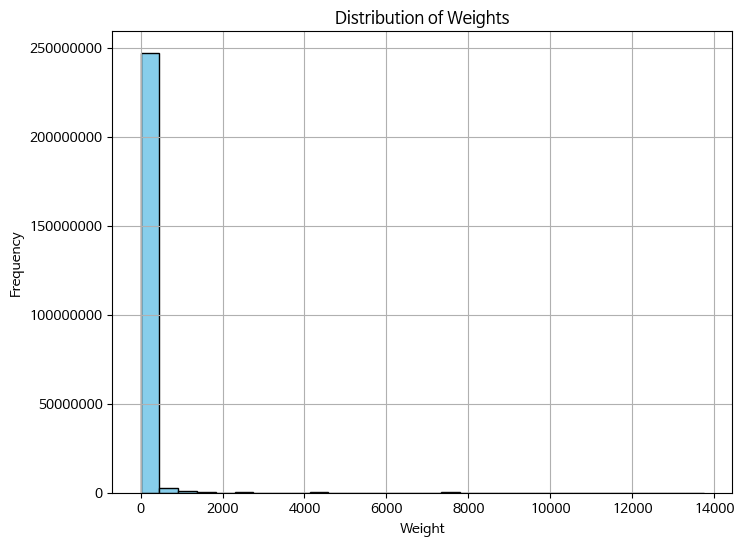

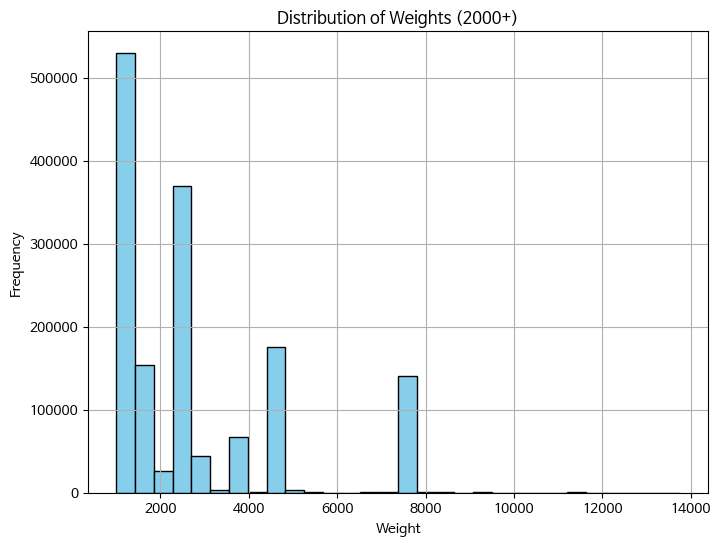

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker

# 모든 가중치 값을 저장할 리스트
all_weights = []

# 질환별로 가중치 값 추출
for disease, co_occurrence in tqdm(disease_co_occurrence.items(), desc="Processing diseases"):
    for tokens, weight in co_occurrence.items():
        all_weights.append(weight)

# 가중치 값의 분포 히스토그램
plt.figure(figsize=(8, 6))
plt.hist(all_weights, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Weights")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}')) # y축 정수 형태 설정

plt.grid(True)
plt.show()

# 가중치 값의 분포 히스토그램(x축 범위 1000 이상으로 제한)
plt.figure(figsize=(8, 6))
plt.hist(all_weights, bins=30, range=(1000, max(all_weights)), color='skyblue', edgecolor='black')
plt.title("Distribution of Weights (2000+)")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}')) # y축 정수 형태 설정

plt.grid(True)
plt.show()

Processing diseases: 100%|██████████| 47/47 [00:12<00:00,  3.65it/s]


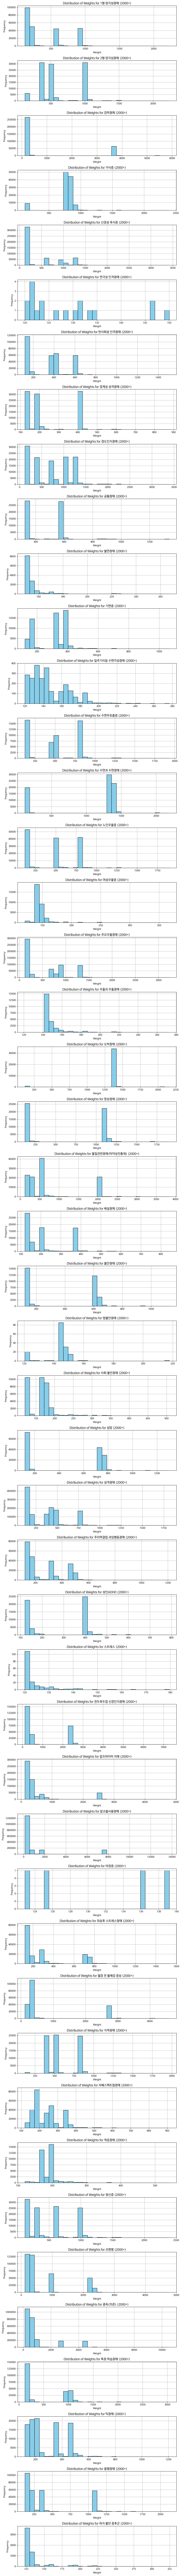

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker

# 질환별로 가중치 값 추출
disease_data = {disease: [weight for tokens, weight in co_occurrence.items() if weight >= 120]
                for disease, co_occurrence in tqdm(disease_co_occurrence.items(), desc="Processing diseases")}

# 전체 그래프의 크기 설정
plt.figure(figsize=(10, len(disease_data) * 3))

# 각 질환별로 하나의 서브플롯을 생성
for i, (disease, weights) in enumerate(disease_data.items(), start=1):
    ax = plt.subplot(len(disease_data), 1, i)
    ax.hist(weights, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f"Distribution of Weights for {disease} (2000+)")
    ax.set_xlabel("Weight")
    ax.set_ylabel("Frequency")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
    ax.grid(True)

# 자동으로 레이아웃 조절
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from tqdm import tqdm

# 질환별 상위 3% 가중치 임계값 계산
disease_thresholds = {}

for disease, co_occurrence in tqdm(disease_co_occurrence.items(), desc="Calculating thresholds"):
    weights = list(co_occurrence.values())
    threshold = np.percentile(weights, 97)  # 상위 3%에 해당하는 가중치 값
    disease_thresholds[disease] = threshold

for disease, threshold in disease_thresholds.items():
    print(f"{disease}: {threshold}")

Calculating thresholds: 100%|██████████| 47/47 [00:15<00:00,  3.00it/s]

1형 양극성장애: 173.78427365016083
2형 양극성장애: 346.09336295141526
강박장애: 127.80962798378185
거식증: 97.95787681168663
신경성 폭식증: 177.50718668326667
연극성 인격장애: 46.52150255285224
반사회성 인격장애: 152.60161681127863
경계성 성격장애: 124.72791944096015
경도인지장애: 772.0222396767463
공황장애: 44.5682886222377
불면장애: 33.110846267746496
기면증: 177.58899876949147
일주기리듬 수면각성장애: 91.80984735637419
수면무호흡증: 482.4582344694216
수면과 수면장애: 83.52121052338424
노인우울증: 134.94223288767833
여성우울증: 54.02891132617129
주요우울장애: 190.60878023178145
우울과 우울장애: 42.72192752239638
도박장애: 68.90014792592548
망상장애: 104.36211310656175
물질관련장애(마약성진통제): 553.3496609371125
배설장애: 201.05559064575428
불안장애: 134.91392593515226
범불안장애: 72.42173909857483
사회 불안장애: 161.81553850005056
섬망: 61.30195680373711
성격장애: 166.91892222939978
주의력결핍 과잉행동장애: 139.01173308196536
성인ADHD: 76.33701390252014
스트레스: 51.90892986014618
전두측두엽 신경인지장애: 428.5173150242001
알츠하이머 치매: 419.8891801319619
알코올사용장애: 245.5820404614192
야경증: 40.32181114094224
외상후 스트레스장애: 165.02578867343922
월경 전 불쾌감 증상: 322.52260479981476


In [ ]:
import pandas as pd

# 질환별 단어 조합 및 가중치 데이터를 저장할 리스트
output_data = []

# 질환별 단어 조합 및 상위 3% 가중치 추출
for disease, co_occurrence in disease_co_occurrence.items():
    threshold = disease_thresholds[disease]  # 각 질환의 상위 3% 임계값
    print(f"\n{disease}의 상위 3% 가중치 임계값: {threshold}")
    for tokens, weight in co_occurrence.items():
        if weight >= threshold:  # 가중치가 상위 3% 임계값 이상인 경우만 저장
            output_data.append([disease, tokens, weight])
            print(f"{tokens} -> Weight: {weight}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
('다리', '벌레', '려고') -> Weight: 139.33843692165783
('다리', '벌레', '당기') -> Weight: 137.89423620323902
('다리', '벌레', '항우울제') -> Weight: 137.89423620323902
('다리', '벌레', '신부전') -> Weight: 137.89423620323902
('다리', '벌레', '기어') -> Weight: 137.89423620323902
('다리', '벌레', '유병') -> Weight: 139.07087599437497
('다리', '벌레', '여성') -> Weight: 139.07087599437497
('다리', '벌레', '흐르') -> Weight: 137.79834217908842
('다리', '벌레', '피부') -> Weight: 137.79834217908842
('다리', '벌레', '그룹') -> Weight: 137.79834217908842
('다리', '벌레', '줄어드') -> Weight: 137.79834217908842
('다리', '벌레', '파킨슨병') -> Weight: 137.79834217908842
('다리', '벌레', '박탈') -> Weight: 137.79834217908842
('다리', '벌레', '병명') -> Weight: 137.79834217908842
('다리', '벌레', '제기') -> Weight: 137.79834217908842
('다리', '벌레', '빈혈') -> Weight: 137.79834217908842
('다리', '벌레', '나이') -> Weight: 138.95486082505545
('다리', '벌레', '악화') -> Weight: 138.95486082505545
('다리', '벌레', '변동') -> Weight: 137.72396099531701
('다리', '벌레', '의료') -> Weigh

In [ ]:
df_output = pd.DataFrame(output_data, columns=["질환명", "단어 조합", "가중치"])
df_output[:20]

,질환명,단어 조합,가중치
0,1형 양극성장애,"(양극, 삽화)",1691.463766
1,1형 양극성장애,"(양극, 장애)",2227.714664
2,1형 양극성장애,"(양극, 조증)",1596.655320
3,1형 양극성장애,"(양극, 기분)",1579.977118
4,1형 양극성장애,"(양극, 평소)",1530.047676
5,1형 양극성장애,"(양극, 경험)",1499.908643
6,1형 양극성장애,"(양극, 조울병)",1418.485723
7,1형 양극성장애,"(양극, 우울증)",1430.964258
8,1형 양극성장애,"(양극, 경우)",1458.451007
9,1형 양극성장애,"(양극, 진단)",1455.070556


In [ ]:
# 최종 질환명으로 통일

# 질환별 최종 질환명 매핑
final_disease_names = {
    "1형 양극성장애": "양극성 장애",
    "2형 양극성장애": "양극성 장애",
    "거식증": "섭식장애",
    "신경성 폭식증": "섭식장애",
    "연극성 인격장애": "인격장애",
    "반사회성 인격장애": "인격장애",
    "경계성 성격장애": "인격장애",
    "불면장애": "수면장애",
    "기면증": "수면장애",
    "수면과 수면장애": "수면장애",
    "일주기리듬 수면각성장애": "수면장애",
    "수면무호흡증": "수면장애",
    "노인우울증": "우울증",
    "여성우울증": "우울증",
    "주요우울장애": "우울증",
    "우울과 우울장애": "우울증",
    "범불안장애": "불안장애",
    "주의력결핍 과잉행동장애": "ADHD",
    "성인ADHD": "ADHD",
    "전두측두엽 신경인지장애": "치매",
    "알츠하이머 치매": "치매",
    "지적장애": "발달장애",
    "자폐스펙트럼장애": "발달장애",
}

df_output['최종 질환명'] = df_output['질환명'].map(final_disease_names).fillna(df_output['질환명'])

# 칼럼 순서 변경
df_output = df_output[['최종 질환명', '질환명', '단어 조합', '가중치']]

df_output.head()

,최종 질환명,질환명,단어 조합,가중치
0,양극성 장애,1형 양극성장애,"(양극, 삽화)",1691.463766
1,양극성 장애,1형 양극성장애,"(양극, 장애)",2227.714664
2,양극성 장애,1형 양극성장애,"(양극, 조증)",1596.655320
3,양극성 장애,1형 양극성장애,"(양극, 기분)",1579.977118
4,양극성 장애,1형 양극성장애,"(양극, 평소)",1530.047676


In [ ]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553752 entries, 0 to 7553751
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   최종 질환명  object 
 1   질환명     object 
 2   단어 조합   object 
 3   가중치     float64
dtypes: float64(1), object(3)
memory usage: 230.5+ MB


In [ ]:
df_output['최종 질환명'].unique()

array(['양극성 장애', '강박장애', '섭식장애', '인격장애', '경도인지장애', '공황장애', '수면장애', '우울증',
       '도박장애', '망상장애', '물질관련장애(마약성진통제)', '배설장애', '불안장애', '사회 불안장애', '섬망',
       '성격장애', 'ADHD', '스트레스', '치매', '알코올사용장애', '야경증', '외상후 스트레스장애',
       '월경 전 불쾌감 증상', '발달장애', '적응장애', '정신증', '조현병', '중독(의존)', '특정 학습장애',
       '틱장애', '품행장애', '하지 불안 증후군'], dtype=object)

In [ ]:
df_output.to_csv("/content/drive/MyDrive/성균관대학교 과제/3학년 2학기/캡스톤설계프로젝트/질환별 증상 조합사전.csv", index=False, encoding='utf-8-sig')